<a href="https://colab.research.google.com/github/CT-Cultures/Content/blob/master/RegOverview_Issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[0] Mount Google Drive

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [1] Setting up Environment and Install Requirements

## [1.1] Set Working Directory, Install Requirements

In [ ]:
import os
import sys
import gc
import datetime as dt

# Set Path
path_wd = '/content/drive/MyDrive/Github/Content'
os.chdir(path_wd)

In [ ]:
%%capture
!pip install -r sources/ChinaFilm/requirements.txt
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

## [1.2] Load and Initialize the Movie Registration Class

In [ ]:
#Load Libraries Global
import pandas as pd
import numpy as np
import torch
from selenium import webdriver
from bs4 import BeautifulSoup
import re


import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.font_manager as fm

path_fonts = '/content/drive/MyDrive/Github/Article/fonts'
fontprop = fm.FontProperties(fname=path_fonts, size= 15)

font_dirs = [path_fonts, ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
#font_list = fm.createFontList(font_files)
for font in font_files:
  fm.fontManager.addfont(font)

plt.rcParams['figure.figsize'] = [15, 9]
mp.rcParams['font.family'] = ['Microsoft YaHei']

%matplotlib inline

In [ ]:
print(mp.get_cachedir())

/root/.cache/matplotlib


In [ ]:
# Load Libraries Local
%load_ext autoreload
%reload_ext autoreload

from sources.ChinaFilm.Record_Registration import Registration, Release # assume relative path at path_wd
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
# Set Path
path_records = '/content/drive/MyDrive/Github/Content/tools/articles/records'

## [1.3] Load Latest Registration Publication

In [ ]:
# Initialize Registration Class
driver = webdriver.Chrome('chromedriver',options=chrome_options)
dy_reg = Registration(driver)

In [ ]:
# check if contents of registrations_existing is fetched,
# can take some time from instantiate dy_reg

dy_reg.contents_of_registrations_existing

In [ ]:
os.chdir('/content/drive/MyDrive/Github/Content/sources/ChinaFilm')
##########################################
# Use update_first=True to get latest records from China Film's Website
# Wait till dy_reg.contents_of_registrations_existing is fully loaded
df = dy_reg.Refined_Records(dy_reg.contents_of_registrations_existing)
##########################################

# curr_issue_name
curr_issue_name = df.sort_values(['公示日期', '公示批次名称'], ascending=False)['公示批次名称'].iloc[0]
df_curr =  df.loc[df.公示批次名称 == curr_issue_name]

issue_name = df_curr['公示批次起始'].iloc[0][0] + '年' + df_curr['公示批次起始'].iloc[0][1] +'月'
issue_name += df_curr['公示批次起始'].iloc[0][2]
print(issue_name)

2021年7月整月


In [ ]:
ls_issues = df['公示日期'].unique()[:6]
df_past6 = df.loc[(df['公示日期'].isin(ls_issues)) & (df['电影类别'] =='纪录片')]

In [ ]:
df_past6['梗概']

30735    《四郎探母》讲述了北宋时期，杨家为抵抗北方各少数民族的南侵，全家男女老少齐上阵，演绎出了一个...
30734    桃花山寨主小霸王周通强娶刘太公之女，鲁智深闻知，乔装新娘，在洞房中痛打小霸王。后桃花山两头领...
30733    《李逵探母》为《水浒传》故事。李逵探母后，负母返梁山途中，至沂岭，母被虎食，李逵怒杀虎，醉后...
30732    京剧《赵氏孤儿》，为1896年，王雁就京剧《搜孤救孤》基础，参考秦腔改编。该剧的人物形象的塑...
30731    吴王夫差灭越，越王勾践用范蠡之计，在苎萝村访得美女西施，献于夫差。夫差被惑，伍员谏阻不成反被...
30730    《望江亭》是张君秋先生著名代表剧目，由剧作家王雁根据元代关汉卿著杂剧《望江亭中秋切绘旦》和川...
30729    京剧《穆桂英挂帅》是梅兰芳等艺术家为庆祝新中国成立十周年，于1959年根据同名豫剧移植而来。...
30728    《凤还巢》为梅兰芳根据清宫藏本《循环序》改编的京剧，原名《阴阳树》，又名《丑配》，于1929...
30727    京剧剧目《龙凤呈祥》取材于《三国演义》第54回“吴国太佛寺看新郎 刘皇叔洞房续佳偶”。是由梅...
30726    四进士是京剧传统剧目。另一个名《节义廉明》。见鼓词《紫金镯》。周信芳、马连良均以此剧享名，而...
30725    该片真实记录了乡村振兴背景下，赣南水西坝村在乡村产业振兴发展中的艰难历程和不同角色坚韧奋进的...
30801    影片为庆祝中国共产党成立100周年大型情景史诗《伟大征程》舞台演出的电影版，也是国内首部大型...
30633    一个退了休的北京老人，选择独自在河北偏远的小山村一住便是25年，与大多数老年人返乡归巢的生活...
30631    2020年11月丁真走红网络，海拔4000米的高城小镇理塘一夜之间备受关注。丁真的家乡什么样...
30630    在中国共产党成立100周年之际，策展人组织百名农民画家创作百幅党的百年历程作品庆祝党的100...
30629    纪录影片以建党百年为主题，通过追寻中国人民解放军特级战斗英雄，现代花木兰郭俊卿的革命之旅，反...
30628    我的爷爷是个盲人算命先生，我的父亲是个“房产老板”，父子因拆建老屋积怨颇深。爷爷觉得自己时日.

## [1.4] Load Title Prediction Model

In [ ]:
%%capture
from transformers import BertTokenizer, BartForConditionalGeneration

# assign device
if torch.cuda.device_count() > 0:
  device = 'cuda:' + str(torch.cuda.current_device())
else:
  device = 'cpu'

# Instantiate tokenizer and model
checkpoint = "/content/drive/MyDrive/Github/Content/tools/models/PredTitle-10000"

tokenizer = BertTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint)
model.to(device)
model.eval()

In [ ]:
batch_size = 8
i = 0
ls = df_past6['梗概'].tolist()
L = df_past6.shape[0]
test_predictions = []

while i < L:
  inputs = tokenizer(ls[i:i+batch_size],
                           padding=True,
                           max_length=512, 
                           truncation=True, 
                           return_tensors='pt')
  inputs.to(device)
  summary_ids = model.generate(input_ids=inputs['input_ids'],
                             num_beams=4,
                             min_length=0,
                             max_length=32
                             )
  
  ret = [tokenizer.decode(g, 
                         skip_specical_tokens=True, 
                         clean_up_tokenization_spaces=True) for g in summary_ids]
  test_predictions.extend(ret)
  i += batch_size

In [ ]:
df_past6['预测片名'] = test_predictions

def remove_specials(x):
  x = re.sub(' ', '', x)
  x = re.sub('\[CLS\]', '', x)
  x = re.sub('\[PAD\]', '', x)
  x = re.sub('\[SEP\]', '', x)
  return x

df_past6['预测片名'] = df_past6['预测片名'].apply(remove_specials)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_past6['预测片名']

30735              四郎探母
30734             桃花山寨主
30733              李逵探母
30732              赵氏孤儿
30731              吴王夫差
30730               望江亭
30729             穆桂英挂帅
30728               凤还巢
30727              龙凤呈祥
30726           紫金镯（京剧）
30725              乡村振兴
30801              伟大征程
30633              北京往事
30631              一夜之间
30630              农民画家
30629               花木兰
30628              算命先生
30627               北极熊
30176              深海沉管
30173              大国种子
30160               上学路
30159             帕米尔之恋
30158             珠穆朗玛峰
30157               黄岗村
30156             男子接力队
30177              英雄联盟
30376              建设奇迹
30375           阿海的生日礼物
30365              重走父亲
30363             黄河入海口
30362           我们的国家公园
30361              古城传奇
30360             而立▪印记
30295              山河之恋
30081            宇宙万物变迁
30144             桂北古民居
30139              深圳之恋
30143            苹果栽培技术
30145            奔跑吧，长跑
30147               桃花坞
30148              天伦之乐
30136           

## [1.5] Genre Classifier

In [ ]:
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding
from datasets import Dataset
from transformers import TrainingArguments, Trainer

In [ ]:
path_wd = '/content/drive/MyDrive/Github/Content'
path_NRTA = '/content/drive/MyDrive/Github/Content/sources/NRTA'

In [ ]:
label2id_time = {'古代': 0, '当代': 1, '现代': 2, '近代': 3}
id2label_time = {}
for k, v in label2id_time.items(): id2label_time[v] = k


label2id_genre= {'传奇': 0, '传记': 1, '其它': 2, '军旅': 3, '农村': 4, '宫廷': 5,  
                  '武打': 6, '涉案': 7, '神话': 8, '科幻': 9, '都市': 10, '青少': 11,
                  '革命': 12}
id2label_genre = {}
for k, v in label2id_genre.items(): id2label_genre[v] = k


In [ ]:
%%capture
# Genre Classifier
N_LABELS = len(id2label_genre)
ID2LABEL = id2label_genre
LABEL2ID = label2id_genre

from transformers import BertTokenizer, BertForSequenceClassification
import torch
############
model_name = '/content/drive/MyDrive/Github/Content/tools/models/chinese-bert-wwm-classification-NRTAgenre'
############
if torch.cuda.device_count() > 0:
  device = 'cuda:' + str(torch.cuda.current_device())
else:
  device = 'cpu'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(
  model_name,
  num_labels=N_LABELS,
  problem_type="multi_label_classification",
  id2label=ID2LABEL,
  label2id=LABEL2ID,  
).to(device)
model.eval() # set model to eval mode for faster prediction

In [ ]:
batch_size = 8
i = 0
ls = df_past6['梗概'].tolist()
softmax = torch.nn.Softmax(dim=-1)
L = df_past6.shape[0]
test_predictions = []

while i < L:
  batch_test = tokenizer(ls[i:i+batch_size],
                           padding=True,
                           max_length=512, 
                           truncation=True, 
                           return_tensors='pt')
  batch_test.to(device)
  batch_outputs = model(**batch_test)
  batch_logtis = batch_outputs.logits
  batch_softmax = softmax(batch_logtis)
  batch_results = torch.argmax(batch_softmax, dim=1).cpu().numpy()
  test_predictions.extend(list(batch_results))
  i += batch_size

df_past6['类型'] = test_predictions
df_past6['类型'] = df_past6['类型'].apply(lambda x: id2label_genre[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## [1.6] Time Period Classifier

In [ ]:
%%capture
# Time Classifier

N_LABELS = len(id2label_time)
ID2LABEL = id2label_time
LABEL2ID = label2id_time

from transformers import BertTokenizer, BertForSequenceClassification
import torch
############
model_name = '/content/drive/MyDrive/Github/Content/tools/models/chinese-bert-wwm-classification-NRTAtime'
############
if torch.cuda.device_count() > 0:
  device = 'cuda:' + str(torch.cuda.current_device())
else:
  device = 'cpu'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(
  model_name,
  num_labels=N_LABELS,
  problem_type="multi_label_classification",
  id2label=ID2LABEL,
  label2id=LABEL2ID,  
).to(device)
model.eval() # set model to eval mode for faster prediction

In [ ]:
batch_size = 8
i = 0
ls = df_past6['梗概'].tolist()
softmax = torch.nn.Softmax(dim=-1)
L = df_past6.shape[0]
test_predictions = []

while i < L:
  batch_test = tokenizer(ls[i:i+batch_size],
                           padding=True,
                           max_length=512, 
                           truncation=True, 
                           return_tensors='pt')
  batch_test.to(device)
  batch_outputs = model(**batch_test)
  batch_logtis = batch_outputs.logits
  batch_softmax = softmax(batch_logtis)
  batch_results = torch.argmax(batch_softmax, dim=1).cpu().numpy()
  test_predictions.extend(list(batch_results))
  i += batch_size

df_past6['年代'] = test_predictions
df_past6['年代'] = df_past6['年代'].apply(lambda x: id2label_time[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## [1.7] 识别主要角色

In [ ]:
import jieba
import jieba.posseg as pseg
jieba.enable_paddle() #启动paddle模式。 0.40版之后开始支持，早期版本不支持

Installing paddle-tiny, please wait a minute......
Paddle enabled successfully......


In [ ]:
# 识别主要角色
def find_PER(x: pd.Series):
  words = pseg.cut(x, use_paddle=True)
  ls_PER = []
  for word, flag in words:
    if flag == 'PER':
      word = word.strip('[\s,，。、“”？；]')
      ls_PER.append(word)
  ls_PER = list(set(ls_PER))

  ls_PER1 = ls_PER.copy()
  ls_PER = []
  while ls_PER1:
    PER =  ls_PER1.pop(0)
    ls_tmp = re.split('[\s,，。、“”？；]', PER)
    ls_PER.extend(ls_tmp)

  ls_PER = list(set(ls_PER)) 
  ls_PER = [PER for PER in ls_PER if len(PER) > 1]
  ls_PER_sorted = sorted(ls_PER, reverse=False, key=lambda x: len(x))

  ans = []
  while ls_PER_sorted:
    PER = ls_PER_sorted.pop(0)
    i = 0
    while i < len(ls_PER_sorted):
      if re.search(PER, ls_PER_sorted[i]):
        ls_PER_sorted.pop(i)
        ans.append(PER)
      i += 1
    if PER not in ans:
      ans.append(PER)

  return ans

df_past6['主要角色'] = df_past6['梗概'].apply(find_PER)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_past6['主要角色'].to_numpy()

array([list(['齐上阵', '杨延辉']),
       list(['李忠', '朱武', '刘太公', '周通报', '鲁智深', '周通强']),
       list(['李逵', '里正', '杀虎', '虎食']), list([]),
       list(['范蠡', '西施', '夫差', '夫差', '王勾践']), list(['王雁', '张君秋', '关汉卿']),
       list(['梅兰芳']), list(['梅兰芳']), list(['梅兰芳', '裘盛戎', '刘皇叔', '袁世海']),
       list(['周信芳', '马连良均']), list([]), list([]), list(['老李']),
       list(['丁真']), list([]), list(['郭俊卿', '花木兰']), list(['高筑']),
       list([]), list(['林鸣']), list([]), list([]), list(['乔戈里', '刘湘晨']),
       list(['张洪']), list([]), list([]), list([]), list([]), list(['阿海']),
       list(['马春利']), list([]), list([]), list([]), list([]), list([]),
       list([]), list(['唐以金']), list([]), list([]),
       list(['刘斯卫', '杨博文', '毕凤阳', '如师如父']), list([]), list([]), list([]),
       list(['王羲之']), list([]), list(['刘策奇']), list([]), list(['弦子']),
       list([]), list([]), list(['杨震', '杨智慧']), list(['张琴']),
       list(['毛泽东'])], dtype=object)

## [1.8] Extract top keywords

In [ ]:
import jieba.analyse
tfidf = jieba.analyse.extract_tags
textrank = jieba.analyse.textrank

df_past6['kw'] = df_past6['梗概'].apply(textrank, topK=10)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.832 seconds.
Prefix dict has been built successfully.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_past6['kw'].to_numpy()

array([list(['故事', '感人', '讲述', '抵抗', '时期', '上阵', '民间', '演绎出', '英雄', '四郎探母']),
       list(['桃花', '洞房', '新娘', '乔装', '山寨', '认出', '报仇', '痛打', '闻知', '强娶']),
       list(['探母', '救出', '虎食', '好汉', '沂岭', '下山', '故事', '负母']),
       list(['剧中', '改编', '颇具', '特色', '塑造', '人物形象', '秦腔', '基础', '参考', '形象']),
       list(['夫差', '西施', '酒色', '国事', '美女', '献于', '败坏', '谏阻', '不成', '日益']),
       list(['剧目', '代表', '改编', '川剧', '先生', '剧作家']),
       list(['庆祝', '中国', '豫剧', '挂帅', '英雄事迹', '移植', '京剧', '保家卫国', '同名', '艺术家']),
       list(['风筝', '情节', '阴阳', '循环', '改编', '原名', '京剧', '首演', '剧本', '传奇']),
       list(['芦花', '洞房', '艺术家', '剧目', '折子戏', '京剧', '原有', '组合', '改编', '新郎']),
       list(['进士', '鼓词', '风格', '剧目', '传统', '金镯', '享名', '京剧']),
       list(['振兴', '乡村', '引发', '感人', '加油', '乡亲们', '故事', '发展', '背景', '产业']),
       list(['情景', '成立', '征程', '舞台', '演出', '影片', '庆祝', '电影版', '电影']),
       list(['北京', '选择', '故乡', '生活', '离开', '内心', '返乡', '老年人', '老人', '执守']),
       list(['关注', '走红', '理塘', '成就', '全民', '海拔', '高城', '备受', '影

# [2] Generating Article Contents

##[2.1] 2021年3月至7月纪录片备案回溯

In [ ]:
# Title
T1 = '{}年'.format(df_past6.tail(1)['公示覆盖期间'].iloc[0][0].year)
T1 += '{}月'.format(df_past6.tail(1)['公示覆盖期间'].iloc[0][0].month)
T1 += '至'
if df_past6.tail(1)['公示覆盖期间'].iloc[0][0].year != \
  df_past6.head(1)['公示覆盖期间'].iloc[0][0].year:
    T1 += '{}年'.format(df_past6.head(1)['公示覆盖期间'].iloc[0][0].year)
T1 += '{}月'.format(df_past6.head(1)['公示覆盖期间'].iloc[0][0].month)

issue_name = T1

T1 += '纪录片备案概览'
print(T1)

2021年3月至7月纪录片备案概览


##[2.2] 	本次回溯共包括6期的公示备案，公示日期分别为2021年9月7日、8月6日、7月2日、6月4日、4月28日和4月2日。


In [ ]:
# Write Content
T2 = ''
T2 += '本次回溯共包括{}期的公示备案，'.format(len(ls_issues))
T2 += '共计{}部影片，'.format(df_past6.shape[0])
T2 += '来自{}个单位。'.format(len(df_past6['备案单位'].unique()))
T2 += '公示日期分别为'
yr = None
i = 0
for dt in ls_issues:
  if not yr: 
    yr = pd.to_datetime(dt).year
    T2 += '{}年'.format(yr)

  elif pd.to_datetime(dt).year != yr:
    yr = pd.to_datetime(dt).year
    T2 += '{}年'.format(yr)

  if i == len(ls_issues)-2:
    T2 += '{}月{}日和'.format(pd.to_datetime(dt).month, pd.to_datetime(dt).day)
  else:
    T2 += '{}月{}日、'.format(pd.to_datetime(dt).month, pd.to_datetime(dt).day)
  
  i+=1

T2 = T2.rstrip('、') + '，'

T2 += '其中，'
T2 += '最遥远的是{}的《{}》，'.format(
    df_past6_sorted.loc[0, '备案立项号'], df_past6_sorted.loc[0, '片名'])
T2 += '最近期的是{}的《{}》。'.format(
    df_past6_sorted.loc[df_past6.shape[0]-1, '备案立项号'], 
    df_past6_sorted.loc[df_past6.shape[0]-1, '片名']
)

print(T2)

本次回溯共包括6期的公示备案，共计52部影片，来自40个单位。公示日期分别为2021年9月7日、8月6日、7月2日、6月4日、4月28日和4月2日，共计52部影片。其中最遥远的是影纪备字〔2021〕第930号的《孩子眼中的世界》，最近期的是影纪备字〔2021〕第982号的《伟大征程》。


## [2.3] 按出品单位性质划分，官方机构出品的预计有37部，民营公司出品的预计有15部，没有识别出上市公司关联项目。

In [ ]:
df_past6['备案单位'].unique()

ls_co_gvt = ['中国数字文化集团有限公司',
             '中国农业电影电视中心',
             '中央新闻纪录电影制片厂（集团）',
             '深圳广播电影电视集团',
             '深圳广电影视股份有限公司',
             '山东新农村数字电影院线有限公司',
             '青海广电影视传媒有限公司',
                          
             ]

In [ ]:
df_past6[~df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))].shape[0]

37

In [ ]:
info_public_film_co = pd.read_csv('/content/drive/MyDrive/Github/Content/tools/articles/reference/info_public_film_co.csv', index_col=0, encoding='utf-8-sig')
ls = info_public_film_co['公司简称'].apply(eval).sum()
pat_public = '|'.join(ls)
pat_public += '|阿里|腾讯|爱奇艺|英皇|寰亚|银都|美亚|大盛|儒意|灿星|横店'
print(pat_public)

df_pub = df_past6[~df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))]
df_pub = df_pub[df_pub['备案单位'].str.contains(pat_public)]
df_pub

中广|欢瑞|文投|苏宁|中视|吉视|吉翔|广厦|横店|中原|上海电影|大晟文化|泰禾|京西文化|北京文化|华数|中南|泛海|瀚叶|时代出版|世茂|中国电影|中影,|浙文|鹿港|东方明珠|当代文体|当代明诚|明诚|江苏有线|喜临门|当代|当代东方|电广传媒|湖南电广|祥源文化|祥源|皇氏|鼎龙|美盛|围海|宇顺|慈文|凯撒|中化岩土|中南|中南红|珠江|万达|浙富|国星|金逸|共达|同洲|奥飞|德力|思美|完美|东网|天威|华录百纳|华录|百纳|川网|华谊|新媒|捷成|中文在线|幸福蓝海|新文化|富春|亿通|唐德|浩洋|华策|数码视讯|平治|芒果|芒果超媒|丝路视觉|光线|台基|博汇|阿里|腾讯|爱奇艺|英皇|寰亚|银都|美亚|大盛|儒意|灿星|横店


,备案立项号,片名,备案单位,编剧,备案结果,备案地,梗概,公示日期,公示批次名称,备案详细页链接,公示批次链接,电影类别,公示年,公示批次起始,类型,备案申请年份,备案立项年度顺序号,公示覆盖期间,公示覆盖天数,预测片名,年代,主要角色,kw
30629,影纪备字〔2021〕第968号,寻找 花木兰,北京新光中视文化传媒有限公司内蒙古分公司、北京新光中视文化传媒有限公司、海南纪录影业有限公司,刘思沅,同意拍摄,内蒙古自治区,纪录影片以建党百年为主题，通过追寻中国人民解放军特级战斗英雄，现代花木兰郭俊卿的革命之旅，反...,2021-08-06,国家电影局关于2021年6月全国电影剧本（梗概） 备案、立项公示的通知-电影备案立项公示-...,http://www.chinafilm.gov.cn/chinafilm/utils/se...,http://www.chinafilm.gov.cn/chinafilm/contents...,纪录片,2021,"(2021, 6, 整月, 6, 整月)",革命,2021,968,"DatetimeIndex(['2021-06-01', '2021-06-02', '20...",30,花木兰,现代,"[郭俊卿, 花木兰]","[历史, 建党, 追求, 时期, 人生, 追寻, 反映, 主题, 纪录, 影片]"


In [ ]:
ids = []
df_past6['focus'] = False
df_past6.loc[ids, 'focus'] = True
df_focus_narrowed = df_past6.loc[ids].copy()

T3 = ''
T3 = '按出品单位性质划分，'
ngvt = df_past6[~df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))].shape[0]
T3 += '官方机构出品的预计有{}部，'.format(ngvt)
T3 += '民营公司出品的预计有{}部，'.format(df_past6.shape[0]-ngvt)

if df_focus_narrowed.shape[0] == 0:
  T3 += '没有识别出上市公司关联项目。'
else:
  T3 += '与上市影视公司相关联的作品{}部，'.format(df_focus_narrowed.shape[0])

  T3 += '占比{}%。'.format(round((df_focus.shape[0]/df_past6.shape[0]*100),2))
  T3 += '结合题材与出品方实力，慷田AI聚焦关注'

  for _, row in df_focus_narrowed.iterrows():
    T3 += '《{}》'.format(row['片名'])
    T3 += '、'
    #T3 += '\n编剧：{writer}'.format(writer=row['编剧'])
    #T3 += '\n备案单位：{co}'.format(co=row['备案单位'])
    #T3 += '\n{synopsis}\n'.format(synopsis=row['梗概'])
  T3 = T5.rstrip('、')
  T3 += '，题材覆盖{}'.format('、'.join(df_focus_narrowed['类型'].unique()))
  T3 += '。'

top_gvt = df_gvt.groupby('备案单位')['片名'].count().sort_values(
    ascending=False)
top_gvt = top_gvt.rename('数量').reset_index()
if  top_gvt.head(1)['数量'].iloc[0] > 1:
  T3 += '最活跃的官方出品方是{}，共计{}部影片，'.format(
      top_gvt.head(1)['备案单位'].iloc[0], 
      top_gvt.head(1)['数量'].iloc[0])
  
  topics = df_gvt.loc[df_gvt['备案单位'] == top_gvt.head(1)['备案单位'].iloc[0],
             '主题'].unique()
  T3 += '内容题材有{}。'.format('、'.join(topics))

  
top_private = df_private.groupby('备案单位')['片名'].count().sort_values(
    ascending=False)
top_private = top_private.rename('数量').reset_index()
if  top_private.head(1)['数量'].iloc[0] > 1:
  T3 += '最活跃的民营出品方是{}，共计{}部影片，'.format(
      top_private.head(1)['备案单位'].iloc[0], 
      top_private.head(1)['数量'].iloc[0])
  
  topics = df_private.loc[df_private['备案单位'] == top_private.head(1)['备案单位'].iloc[0],
             '主题'].unique()
  T3 += '内容题材有{}。'.format('、'.join(topics))

#df_gvt.groupby('备案单位')['片名'].count().sort_values(ascending=False)

print(T3)

按出品单位性质划分，官方机构出品的预计有37部，民营公司出品的预计有15部，没有识别出上市公司关联项目。最活跃的官方出品方是中国数字文化集团有限公司，共计10部影片，内容题材有戏曲。最活跃的民营出品方是北京欣欣向阳影视文化发展有限公司，共计4部影片，内容题材有人物聚焦、人文游记、人文体育。


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


##[2.4] 按影片内容体现的年代划分，当代32部、古代8部、现代6部以及近代6部。

<Figure size 864x504 with 0 Axes>

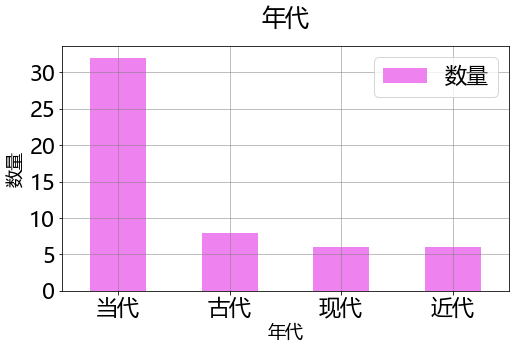

In [ ]:
df_n_time = df_past6.groupby('年代')['年代'].count().rename('数量'
  ).reset_index().sort_values('数量', ascending=False)

plt.clf()
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['axes.facecolor'] = 'white'
ax = df_n_time.plot(
    kind = 'bar',
    grid = True,
    fontsize = 22,
    rot = 0,
    color = ['violet'],
)
ax.set_title("年代",fontsize= 24, pad=20)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_xlabel('年代',fontsize= 18)
ax.set_xticklabels(df_n_time['年代'])
ax.set_ylabel("数量",fontsize= 18)
ax.legend(fontsize=22)

fp_plot_time = path_img + '/df_RegDoct_plot_time_{}.png'.format(issue_name)
plt.savefig(fp_plot_time)

plt.show()

## [2.5] 按选题划分，人物聚焦14部、戏曲10部、人文艺术4部、工业建设4部、人文体育3部、人文游记3部、战争与革命3部、乡村2部、人文自然2部、人文风光2部、农业2部、城市变迁1部、演出1部以及考古1部

In [ ]:
T4 = ''
T4 += '按影片内容体现的年代划分，'
for i, row in df_n_time.iterrows():
  if i == df_n_time.shape[0]-2:
    T4 += '{}{}部以及'.format(row['年代'], row['数量'])
  else:
    T4 += '{}{}部、'.format(row['年代'], row['数量'])

T4 = T4.rstrip('、') + '。'

print(T4)

按影片内容体现的年代划分，当代32部、古代8部、现代6部以及近代6部。


In [ ]:
ls_topic = ['戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '戏曲',
       '乡村',
       '演出与活动',
       '人物聚焦',
       '人物聚焦',
       '人物聚焦',
       '人物聚焦',
       '人物聚焦',
       '人物聚焦',
       '工业建设',
       '农业',
       '人物聚焦',
       '人文游记',
       '人文体育',
       '乡村',
       '人文体育',
       '战争与革命',
       '工业建设',
       '人物聚焦',
       '人文游记',
       '战争与革命',
       '人文风光',
       '考古',
       '人物聚焦',
       '人文自然',
       '人文自然',
       '人物聚焦',
       '城市变迁',
       '农业',
       '人文体育',
       '人文风光',
       '人物聚焦',
       '人文艺术',
       '人文艺术',
       '工业建设',
       '战争与革命',
       '人文艺术',
       '人物聚焦',
       '人文艺术',
       '人物聚焦',
       '人文游记',
       '人物聚焦',
       '工业建设']
df_past6['主题'] = ls_topic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 576x324 with 0 Axes>

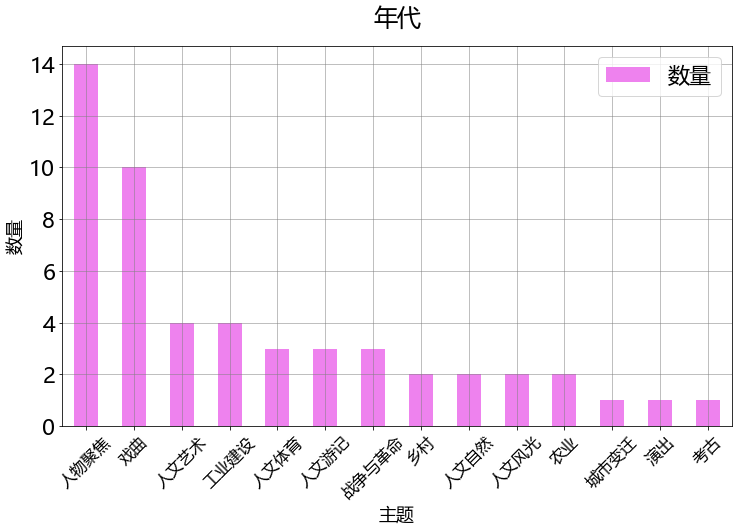

In [ ]:
df_n_topic = df_past6.groupby('主题')['主题'].count().rename('数量'
  ).reset_index().sort_values('数量', ascending=False)

plt.clf()
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.facecolor'] = 'white'
ax = df_n_topic.plot(
    kind = 'bar',
    grid = True,
    fontsize = 22,
    rot = 0,
    color = ['violet'],
)
ax.set_title("年代",fontsize= 24, pad=20)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_xlabel('主题',fontsize= 18)
ax.set_xticklabels(df_n_topic['主题'], fontsize= 16, rotation=45)
ax.set_ylabel("数量",fontsize= 18)
ax.legend(fontsize=22)

fp_plot_topic = path_img + '/df_RegDoct_plot_topic_{}.png'.format(issue_name)
plt.savefig(fp_plot_topic)

plt.show()

In [ ]:
T5 = ''
T5 += '按选题划分，'
for i, row in df_n_topic.iterrows():
  if i == df_n_topic.shape[0]-2:
    T5 += '{}{}部以及'.format(row['主题'], row['数量'])
  else:
    T5 += '{}{}部、'.format(row['主题'], row['数量'])

T5 = T5.rstrip('、') + '。'

print(T5)

按选题划分，人物聚焦14部、戏曲10部、人文艺术4部、工业建设4部、人文体育3部、人文游记3部、战争与革命3部、乡村2部、人文自然2部、人文风光2部、农业2部、城市变迁1部、演出1部以及考古1部。


In [ ]:
dfbyco = df_past6.set_index('备案单位')
dfbyco[['片名', '年代', '类型', '梗概', '预测片名']]

In [ ]:
df_past6.columns

Index(['备案立项号', '片名', '备案单位', '编剧', '备案结果', '备案地', '梗概', '公示日期', '公示批次名称',
       '备案详细页链接', '公示批次链接', '电影类别', '公示年', '公示批次起始', '类型', '备案申请年份',
       '备案立项年度顺序号', '公示覆盖期间', '公示覆盖天数', '预测片名', '年代', '主要角色', 'kw', 'focus'],
      dtype='object')

In [ ]:
df_past6[~df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))]['主题'].unique()

array(['人物聚焦', '工业建设', '农业', '人文游记', '人文体育', '乡村', '战争与革命', '考古', '人文自然',
       '人文风光', '人文艺术', '文化艺术'], dtype=object)

##[2.6] 生成词云图
 Create Summary Word Cloud ImageImage

In [ ]:
import wordcloud
from PIL import Image
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path_font = '/content/drive/MyDrive/Github/Content/tools/articles/fonts/STHUPO.TTF'
path_img = '/content/drive/MyDrive/Github/Content/tools/articles/img'

def generate_word_image(ls_words, img_name):
  path_genre_icon = path_img + '/genre_icon/{}'.format(img_name)
  path_mask_image = path_img + '/genre_icon/mask_{}'.format(img_name)
  path_color_image = path_img + '/genre_icon/{}'.format(img_name)

  #wordcloud.color_from_image(coloring)
  mask = np.array(Image.open(path_mask_image)) # 定义词频背景
  coloring = np.array(Image.open(path_color_image)) # Load Image for coloring
  #image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
  #image_colors = wordcloud.ImageColorGenerator(coloring, default_color=(79, 46, 47))
  image_colors = wordcloud.ImageColorGenerator(coloring)
  #wc.recolor(color_func=image_colors,  random_state=3)

  #image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案

  wc = wordcloud.WordCloud(
      font_path=path_font,
      width = 400,
      height = 100,
      scale = 1,
      mask=mask, # set back ground mask image
      max_words=224,
      max_font_size=188,
      min_font_size=2,
      #mode="RGBA",
      mode="RGB",
      background_color='white',
      #background_color=None, 
      #background_color="rgba(255, 255, 255, 0)", 
      #contour_width=3, 
      #contour_color='steelblue',
      repeat=True,
      color_func=image_colors,
  )

  wc.generate(','.join(ls_words))

  #image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
  #wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案

  plt.imshow(wc) # 显示词云
  plt.axis('off') # 关闭坐标轴
  plt.show()

  fp_generated_img = path_img + '/FilmReg_Documentary_'  \
             + img_name.split('.')[0] + '_' \
             + ls_words[0] + '_' + issue_name + '.png'
  wc.to_file(fp_generated_img)

  return fp_generated_img


In [ ]:
df_topics2img

,主题,img
30735,戏曲,low-poly-2789706_1280.png
30725,乡村,sun-1064482_1280.png
30801,演出,rose-31436_1280.png
30633,人物聚焦,family-2112266_1280.png
30176,工业建设,colorful-1312810_1280.png
30173,农业,carrot-33625_1280.png
30159,人文游记,feet-3350837_1280.png
30158,人文体育,colorful-1220745_1280.png
30177,战争与革命,muscle-1085672_1280.png
30362,人文风光,animal-1320792_1280.png


In [ ]:
df_topics2img = df_past6['主题'].drop_duplicates().to_frame()
df_topics2img ['img'] = None

df_topics2img ['主题'].to_numpy()

df_topics_img = ['low-poly-2789706_1280.png', 
 'sun-1064482_1280.png', 'rose-31436_1280.png', 
 'family-2112266_1280.png', 'colorful-1312810_1280.png', 'carrot-33625_1280.png', 
 'feet-3350837_1280.png', 'colorful-1220745_1280.png', 'muscle-1085672_1280.png',
 'art-2687649_1280.png', 'graphic-4259507_1280.png', 
 'colorful-1220745_1280.png', 
 'colorful-1197312_1280.png', 'low-poly-2789706_1280.png'
]
 
df_topics2img['img']  = df_topics_img

In [ ]:
%%capture
df_private = df_past6[~df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))]

df_private['src_img'] = None
df_private['tgt_img'] = None

In [ ]:
df_private.columns

Index(['备案立项号', '片名', '备案单位', '编剧', '备案结果', '备案地', '梗概', '公示日期', '公示批次名称',
       '备案详细页链接', '公示批次链接', '电影类别', '公示年', '公示批次起始', '类型', '备案申请年份',
       '备案立项年度顺序号', '公示覆盖期间', '公示覆盖天数', '预测片名', '年代', '主要角色', 'kw', 'focus',
       '主题', 'src_img', 'tgt_img'],
      dtype='object')

In [ ]:
for i in df_private.index:
  ls = [df_private.loc[i, '片名']] * 10
  ls += [df_private.loc[i, '预测片名']] *6
  ls += df_private.loc[i, '主要角色']*3
  ls += [df_private.loc[i, '主题']] *3
  ls += [df_private.loc[i, '年代']]*2
  ls += df_private.loc[i, 'kw']
  img_fn = df_private.loc[i, 'src_img']
  if not img_fn:
    img_fn = df_topics2img.loc[
        df_topics2img['主题'] == df_private.loc[i, '主题'],
        'img'
    ].iloc[0]
    print(df_private.loc[i, '主题'])
  fp_generated_img = generate_word_image(ls, img_fn)
  df_private.loc[i, 'tgt_img'] = fp_generated_img

In [ ]:
df_gvt = df_past6[df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))]

df_gvt_count = df_gvt.groupby('备案单位')['片名'].count().rename(
    '数量').reset_index()
df_gvt = df_gvt.merge(df_gvt_count, on='备案单位', how='left')
df_gvt = df_gvt.sort_values('数量', ascending='False')

df_gvt.columns

Index(['备案立项号', '片名', '备案单位', '编剧', '备案结果', '备案地', '梗概', '公示日期', '公示批次名称',
       '备案详细页链接', '公示批次链接', '电影类别', '公示年', '公示批次起始', '类型', '备案申请年份',
       '备案立项年度顺序号', '公示覆盖期间', '公示覆盖天数', '预测片名', '年代', '主要角色', 'kw', 'focus',
       '主题', '数量'],
      dtype='object')

In [ ]:
df_gvt['src_img'] = None
df_gvt['tgt_img'] = None

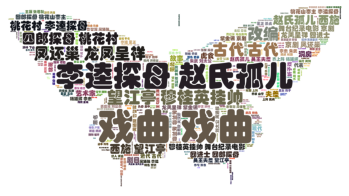

['四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花村', '李逵探母', '赵氏孤儿', '西施', '望江亭', '穆桂英挂帅（舞台纪录电影·京剧）', '凤还巢', '龙凤呈祥', '四进士', '四郎探母', '桃花山寨主', '李逵探母', '赵氏孤儿', '吴王夫差', '望江亭', '穆桂英挂帅', '凤还巢', '龙凤呈祥', '紫金镯（京剧）', '四郎探母', '桃花山寨主', '李逵探母', '赵氏孤儿', '吴王夫差', '望江亭', '穆桂英挂帅',

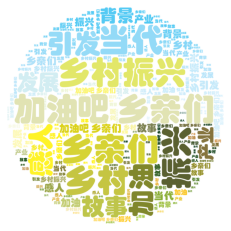

['加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '加油吧！乡亲们', '乡村振兴', '乡村振兴', '乡村振兴', '乡村振兴', '乡村振兴', '乡村振兴', '乡村', '乡村', '乡村', '当代', '当代', '当代', '振兴', '乡村', '引发', '感人', '加油', '乡亲们', '故事', '发展', '背景', '产业', '振兴', '乡村', '引发', '感人', '加油', '乡亲们', '故事', '发展', '背景', '产业', '振兴', '乡村', '引发', '感人', '加油', '乡亲们', '故事', '发展', '背景', '产业'] sun-1064482_1280.png


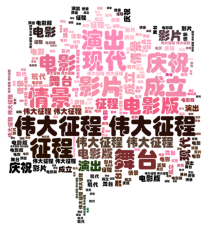

['伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '伟大征程', '演出', '演出', '演出', '现代', '现代', '现代', '情景', '成立', '征程', '舞台', '演出', '影片', '庆祝', '电影版', '电影', '情景', '成立', '征程', '舞台', '演出', '影片', '庆祝', '电影版', '电影', '情景', '成立', '征程', '舞台', '演出', '影片', '庆祝', '电影版', '电影'] rose-31436_1280.png


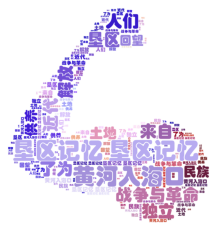

['垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '垦区记忆', '黄河入海口', '黄河入海口', '黄河入海口', '黄河入海口', '黄河入海口', '黄河入海口', '战争与革命', '战争与革命', '战争与革命', '近代', '近代', '近代', '垦区', '独立', '了为', '来自', '人们', '解放', '土地', '供养', '民族', '回望', '垦区', '独立', '了为', '来自', '人们', '解放', '土地', '供养', '民族', '回望', '垦区', '独立', '了为', '来自', '人们', '解放', '土地', '供养', '民族', '回望'] muscle-1085672_1280.png


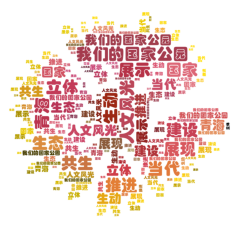

['青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '青海·我们的国家公园', '我们的国家公园', '我们的国家公园', '我们的国家公园', '我们的国家公园', '我们的国家公园', '我们的国家公园', '人文风光', '人文风光', '人文风光', '当代', '当代', '当代', '青海', '生态', '国家', '建设', '共生', '立体', '生动', '展现', '推进', '展示', '青海', '生态', '国家', '建设', '共生', '立体', '生动', '展现', '推进', '展示', '青海', '生态', '国家', '建设', '共生', '立体', '生动', '展现', '推进', '展示'] art-2687649_1280.png


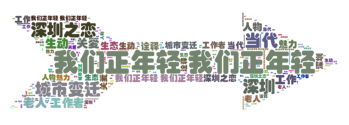

['我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '我们正年轻', '深圳之恋', '深圳之恋', '深圳之恋', '深圳之恋', '深圳之恋', '深圳之恋', '城市变迁', '城市变迁', '城市变迁', '当代', '当代', '当代', '深圳', '老人', '生动', '关爱', '工作者', '工作', '人物', '诠释', '生态', '魅力', '深圳', '老人', '生动', '关爱', '工作者', '工作', '人物', '诠释', '生态', '魅力', '深圳', '老人', '生动', '关爱', '工作者', '工作', '人物', '诠释', '生态', '魅力'] colorful-1197312_1280.png


In [ ]:
for i, row in df_gvt[['备案单位', '数量']].drop_duplicates().sort_values(
    '数量', ascending=False).iterrows():
    ls = df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], '片名'].to_list()*10
    ls += df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], '预测片名'].to_list()*6
    ls += df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], '主题'].to_list()*3
    ls += df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], '年代'].to_list()*3

    ls_tmp = df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], '主要角色'].to_list()
    ls_tmp1 = []
    for l in ls_tmp:
      ls_tmp1.extend(l)
    ls += ls_tmp1*3

    ls_tmp = df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], 'kw'].to_list()
    ls_tmp1 = []
    for l in ls_tmp:
      ls_tmp1.extend(l)
    ls += ls_tmp1*3

    img_choice = random.choice(
        df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], '主题'].to_list())
    
    img_fn = df_topics2img.loc[
      df_topics2img['主题'] == img_choice,
      'img'
    ].iloc[0]

    fp_generated_img = generate_word_image(ls, img_fn)

    df_gvt.loc[df_gvt['备案单位'] == row['备案单位'], 'tgt_img'] = fp_generated_img
    print(ls, img_fn)


In [ ]:
ls_topic_sorted = df_private.groupby('主题')['片名'].count().sort_values(
    ascending=False).reset_index()

ls_topic_sorted

,主题,片名
0,人物聚焦,14
1,工业建设,4
2,人文艺术,4
3,人文游记,3
4,人文体育,3
5,战争与革命,2
6,农业,2
7,人文自然,2
8,考古,1
9,人文风光,1


## [2.7A] 生成图文内容，独立

In [ ]:
from IPython.display import Image as Img

T6 = ''

#df_private['tgt_img']
#df_gvt['tgt_img']

ls_topic_sorted = df_private.groupby('主题')['片名'].count().sort_values(
    ascending=False).reset_index()
ls_topic_sorted = ls_topic_sorted['主题'].tolist()

T6 += '独立纪录片题材丰富，内容包括了{}'.format('、'.join(ls_topic_sorted))
T6 += '。'
print(T6)
for topic in ls_topic_sorted:
  dftmp = df_private[df_private['主题'] == topic]
  print(topic)
  for i, row in dftmp.iterrows():
    print('《{}》，{}'.format(row['片名'], row['编剧']))
    print(row['备案单位'])
    display(Img(row['tgt_img'], width=300))



print(T6)

## [2.7B] 生成图文内容，官方

In [ ]:
T7 = ''

#df_private['tgt_img']
#df_gvt['tgt_img']

ls_co_sorted = df_gvt.groupby('备案单位')['片名'].count().sort_values(
    ascending=False).reset_index()
ls_co_sorted = ls_co_sorted['备案单位'].tolist()

T7 += '官方制作机构分工明确，制作内容各有特色，包括了{}'.format('、'.join(ls_topic_sorted))
T7 += '。'
print(T7)
for co in ls_co_sorted:
  dftmp = df_gvt[df_gvt['备案单位'] == co]
  print('\n{}，{}部'.format(co, dftmp.shape[0]))
  for j, row in dftmp[['片名', '编剧']].iterrows():
    print('《{}》，{}；'.format(row['片名'], row['编剧']))
  
  display(Img(dftmp['tgt_img'].iloc[0], width=300))


##[2.7] 生成摘要
2021年4月28日，3月的电影备案公示发布，其中最遥远的是影剧备字〔2021〕第1360号的《幕后英雄》，最近期的是影特备字〔2021〕第006号的《熊猫传奇——黑洞之吻》，慷田AI聚焦、重点关注的项目有中国电影的《发明一个夏天》、光线的《计划外的姐弟恋》、《二郎神》、《土行孙之破土重生》、爱奇艺的《日常警事》以及阿里的《无价之宝》。

In [ ]:
S0 = ''
S0 += issue_name

S0 += '的纪录片电影备案'
S0 += '共计{}部影片，'.format(df_past6.shape[0])
S0 += '来自{}个单位，'.format(len(df_past6['备案单位'].unique()))
ngvt = df_past6[~df_past6['备案单位'].str.contains('|'.join(ls_co_gvt))].shape[0]
S0 += '官方出品{}部，'.format(ngvt)
S0 += '独立出品{}部，'.format(df_past6.shape[0]-ngvt)

if df_focus_narrowed.shape[0] == 0:
  S0 += '无上市公司关联项目。'
else:
  S0 += '其中与上市影视公司关联的项目有{}部，'.format(df_focus_narrowed.shape[0])

"""
S0 += '慷田AI聚焦关注的项目有'
for i, row in df_f.iterrows():
  if i == df_f.shape[0]-1:
    S0 = S0.rstrip('、')
    S0 += '以及{co}的{film}'.format(co=row['单位简称'], film=row['关注影片'])
  else:
    S0 += '{co}的{film}、'.format(co=row['单位简称'], film=row['关注影片'])
S0 += '。'
"""
print(S0)

2021年3月至7月的纪录片电影备案共计52部影片，来自40个单位，官方出品37部，独立出品15部，无上市公司关联项目。


##[2.8] 指向电影剧官网


In [ ]:
#####
T8 = '\n\n'
T8 += '慷田AI结合自主调研及多方大数据比对，通过分析、建模，提炼关键信息。'
T8 += '电影立项备案公示信息来自中国国家电影局 China Film Administration, 官方网址 '
T8 += ' http://www.chinafilm.gov.cn/chinafilm 。'

print(T6)

独立纪录片题材丰富，内容包括了人物聚焦、工业建设、人文艺术、人文游记、人文体育、战争与革命、农业、人文自然、考古、人文风光、乡村。


## [2.9] Save or load df_{issue_name}

In [ ]:
issue_name

'2021年3月至7月'

In [ ]:
# Save records for current reg issue
path_records = '/content/drive/MyDrive/Github/Content/tools/articles/records'
df_past6.to_pickle(path_records + '/df_RegDocPast6_{}.pkl'.format(issue_name))
df_private.to_pickle(path_records + '/df_RegDoc_private_{}.pkl'.format(issue_name))
df_gvt.to_pickle(path_records + '/df_RegDoc_gvt_{}.pkl'.format(issue_name))

In [ ]:
df_past6 = pd.read_pickle(path_records + '/df_DocumentaryReg_{}.pkl'.format(issue_name))

#[3] Output Word Document

In [ ]:
df_private.groupby('主题')['片名'].count()

主题
乡村        1
人文体育      3
人文游记      3
人文自然      2
人文艺术      4
人文风光      1
人物聚焦     14
农业        2
工业建设      4
战争与革命     2
考古        1
Name: 片名, dtype: int64

## 3.1 Install and Load Libraries

In [ ]:
%%capture
!pip install python-docx
!pip install lxml
from docx import Document
from docx.shared import Inches
#from docx.text.parargaph import Paragraph

## 3.2 Output Docx


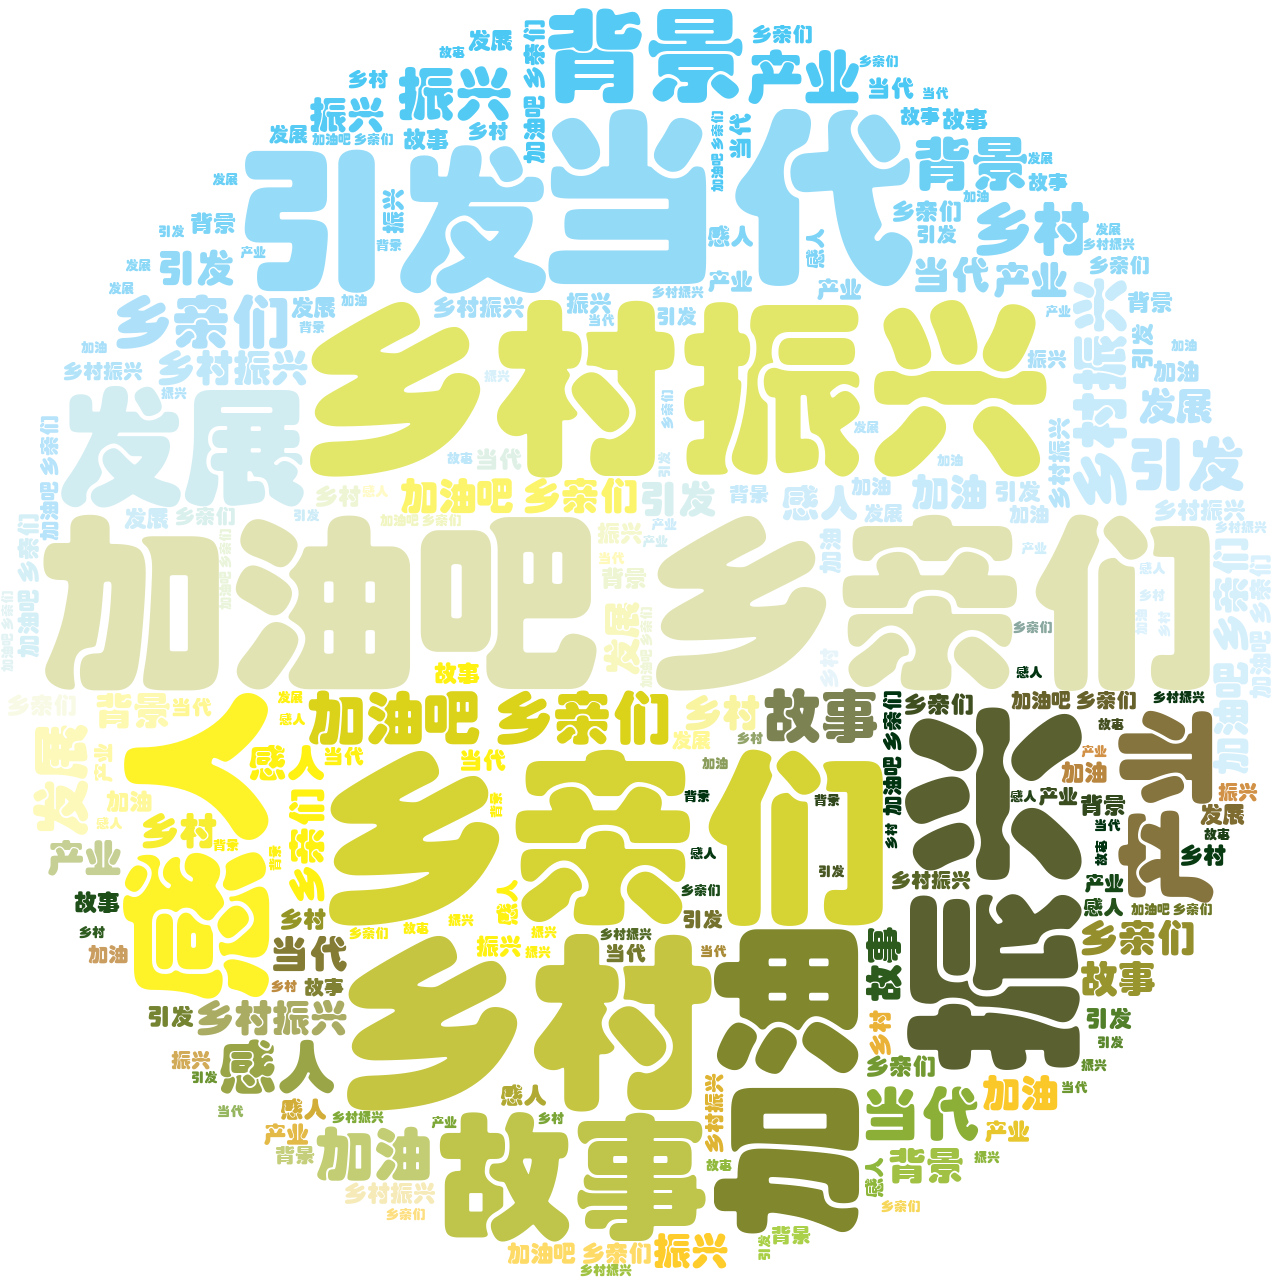

In [ ]:
display(Img(dftmp['tgt_img'].iloc[0], width=300))

In [ ]:
T5

'按选题划分，人物聚焦14部、戏曲10部、人文艺术4部、工业建设4部、人文体育3部、人文游记3部、战争与革命3部、乡村2部、人文自然2部、人文风光2部、农业2部、城市变迁1部、演出1部以及考古1部。'

In [ ]:
path_doc = '/content/drive/MyDrive/Github/Content/tools/articles/docx'

doc = Document()
doc.core_properties.title = 'China Film Documentary Registration Overview ' \
  + issue_name

doc.add_heading(T1, 0)

p = doc.add_paragraph(S0, style='Intense Quote')

doc.add_paragraph(T2)

doc.add_paragraph(T3)

doc.add_paragraph(T4)
doc.add_picture(fp_plot_time, width =Inches(5))

doc.add_paragraph(T5)
doc.add_picture(fp_plot_topic, width =Inches(5))

doc.add_paragraph(T6)
ls_topic_sorted = df_private.groupby('主题')['片名'].count().sort_values(
    ascending=False).reset_index()
ls_topic_sorted = ls_topic_sorted['主题'].tolist()
for topic in ls_topic_sorted:
  dftmp = df_private[df_private['主题'].str.contains(topic)]
  doc.add_heading(topic, 1)
  for i, row in dftmp.iterrows():
    txt = '《{}》，{}\n'.format(row['片名'], row['编剧'])
    txt += '{}\n'.format(row['备案单位'])
    doc.add_paragraph(txt)
    doc.add_picture(row['tgt_img'], width =Inches(4))

doc.add_paragraph(T7)
ls_co_sorted = df_gvt.groupby('备案单位')['片名'].count().sort_values(
    ascending=False).reset_index()
ls_co_sorted = ls_co_sorted['备案单位'].tolist()
for co in ls_co_sorted:
  dftmp = df_gvt[df_gvt['备案单位'] == co]
  doc.add_heading( '{}，{}部'.format(co, dftmp.shape[0]), 1)
  txt = ''
  for j, row in dftmp[['片名', '编剧']].iterrows():
    txt += '《{}》，{}；'.format(row['片名'], row['编剧'])
  txt = txt.rstrip('；')
  doc.add_paragraph(txt)
  doc.add_picture(dftmp['tgt_img'].iloc[0], width =Inches(5))


doc.add_paragraph(T8)

doc.save(path_doc + '/ChinaFilm_DocumentaryReg_' + issue_name + '.docx' )


In [ ]:
path_doc = '/content/drive/MyDrive/Github/Content/tools/articles/docx'

doc = Document()
doc.core_properties.title = 'China Film Documentary Registration Table' \
  + issue_name

doc.add_heading('{}纪录片备案汇总'.format(issue_name), 0)

p = doc.add_paragraph(S0, style='Intense Quote')

table = doc.add_table(rows=1, cols=1, style='Light List Accent 5')
i = 1
for _, row in df_past6.iterrows():
  row_cells = table.add_row().cells
  row_cells[0].text = '[' + str(i) + ']' + '《'.format(i) + row['片名'] + '》'

  row_cells = table.add_row().cells
  row_cells[0].text = '编剧：' + row['编剧']

  row_cells = table.add_row().cells
  row_cells[0].text = '备案单位：' + row['备案单位']

  row_cells = table.add_row().cells
  row_cells[0].text = '主题：{}  年代：{}'.format(row['主题'], row['年代'])

  row_cells = table.add_row().cells
  row_cells[0].text = row['梗概']

  row_cells = table.add_row().cells
  row_cells[0].text = ''
  i+=1

doc.add_paragraph(T8)

doc.save(path_doc + '/ChinaFilm_DocumentaryReg_Table_' + issue_name + '.docx' )
